In [1]:
from file_reader import *
from collections import defaultdict
import matplotlib.pyplot as plt, numpy
mass_1025 = 0.002796

In [2]:
import pylab as pl
# la = pl.matplotlib.font_manager.FontManager()
# lu = pl.matplotlib.font_manager.FontProperties(family = 'Heuristica')
# la.findfont(lu)

plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{heuristica}\usepackage{newtxmath}\usepackage[T1]{fontenc}\usepackage{newtxmath}')


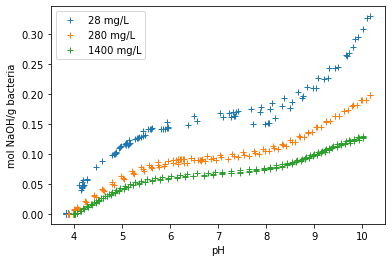

In [3]:
fig = plt.figure()

pttwos = [TitrationData('input_data/1025/PC_LIMS_Report-20201026-135736.txt', '200uL_0gpL_1', 0.10051, 0, mass_1025, -0.1),
          TitrationData('input_data/1025/PC_LIMS_Report-20201026-150929.txt', '200uL_0gpL_2', 0.10051, 0, mass_1025, -0.1),
          TitrationData('input_data/1025/PC_LIMS_Report-20201026-161307.txt', '200uL_0gpL_3', 0.100484, 0, mass_1025, -0.1)]

twos = [TitrationData('input_data/1026/PC_LIMS_Report-20201027-133745.txt', '2000uL_1', 0.103476, 0, mass_1025*10, -0.1),
        TitrationData('input_data/1026/PC_LIMS_Report-20201027-143046.txt', '2000uL_2', 0.103632, 0, mass_1025*10, -0.1),
        TitrationData('input_data/1020/PC_LIMS_Report-20201021-201854.txt', '2000uL_3', 0.105585, 0, mass_1025*10, -0.1)]

tens = [TitrationData('input_data/1026/PC_LIMS_Report-20201027-141130.txt', '10000uL_1', 0.11636, 0, mass_1025*50, -0.1),
        TitrationData('input_data/1026/PC_LIMS_Report-20201027-141130.txt', '10000uL_2', 0.119036, 0, mass_1025*50, -0.1),
        TitrationData('input_data/1020/PC_LIMS_Report-20201021-204044.txt', '10000uL_3', 0.116778, 0, mass_1025*50, -0.1)]

concs = [pttwos, twos, tens]
concs_names = ['pttwos', 'twos', 'tens']
colours = ['tab:blue', 'tab:orange', 'tab:green']
label_list = ['0.2 mL', '2 mL', '10 mL']
label_list = ['28 mg/L', '280 mg/L', '1400 mg/L']
doses = defaultdict(dict) 

for i in range(len(concs)):
    source = doses[concs_names[i]]
    source['d'] = concs[i] # 'd' is for data list defined above 
    source['c'] = colours[i] # 'c' is the colour specified
    source['l'] = label_list[i] # 'l' is for label
    
for dose in doses:
    conc = doses[dose]
    for run in range(len(conc['d'])):
        data = conc['d'][run].df
        vols = data.vol.values # mL
        init_vol = conc['d'][run].init_vol + vols/1000 # L
        Nacid = -1*conc['d'][run].Nacid # mol/L
        adsorbent_mass = conc['d'][run].adsorbent_mass # g
        mols = vols/1000*Nacid/init_vol
        plt.plot(data.pH, mols/adsorbent_mass, color=conc['c'], marker='+', linewidth=0, label=conc['l'] if run == 0 else "")

plt.legend()
plt.xlabel('pH')
plt.ylabel('mol NaOH/g bacteria')
plt.show()
fig.savefig('biomass_fx.png', dpi=600)

In [8]:
pttwos[0].protofit_formatter()

In [9]:
pttwos[0].nob

36